# Data Analysis & Visualization on rainfall data set

In [64]:
#Data Preparation and Cleaning
#for visualizations
import seaborn as sns
import matplotlib.pyplot as plt

#for manipulations
import pandas as pd
import numpy as np

#for interactivity
from ipywidgets import interact

import scipy.stats as stats
%matplotlib inline

In [65]:
#Read the data
data=pd.read_csv("rainfall.csv")

In [66]:
#check the shape of the data
print("shape of the dataset:", data.shape)

shape of the dataset: (684, 19)


In [67]:
data.head()

,STATE_UT_NAME,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1997,9.5,0.0,0.2,15.6,281.1,199.5,918.5,430.6,440.2,128.7,292.8,38.4,2755.1,9.5,296.9,1988.8,459.9
1,ANDAMAN & NICOBAR ISLANDS,1998,0.9,0.0,0.0,0.0,348.9,600.0,364.5,258.9,337.8,618.6,227.8,89.0,2846.4,0.9,348.9,1561.2,935.4
2,ANDAMAN & NICOBAR ISLANDS,1999,46.8,44.6,14.2,270.6,257.4,295.0,408.5,329.2,325.3,437.5,124.9,145.7,2699.7,91.4,542.2,1358.0,708.1
3,ANDAMAN & NICOBAR ISLANDS,2000,53.0,59.0,171.3,218.1,422.8,357.0,176.3,460.8,250.1,321.2,158.3,115.2,2763.2,112.0,812.2,1244.2,594.7
4,ANDAMAN & NICOBAR ISLANDS,2001,89.0,15.7,143.3,30.1,705.3,370.7,341.3,469.0,334.4,267.6,222.6,91.8,3080.9,104.7,878.7,1515.4,582.0


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   STATE_UT_NAME  684 non-null    object 
 1   YEAR           684 non-null    int64  
 2   JAN            683 non-null    float64
 3   FEB            683 non-null    float64
 4   MAR            684 non-null    float64
 5   APR            684 non-null    float64
 6   MAY            684 non-null    float64
 7   JUN            684 non-null    float64
 8   JUL            683 non-null    float64
 9   AUG            684 non-null    float64
 10  SEP            684 non-null    float64
 11  OCT            684 non-null    float64
 12  NOV            683 non-null    float64
 13  DEC            683 non-null    float64
 14  ANNUAL         681 non-null    float64
 15  Jan-Feb        682 non-null    float64
 16  Mar-May        684 non-null    float64
 17  Jun-Sep        683 non-null    float64
 18  Oct-Dec   

In [69]:
#Lets check if there is any missing value present in the dataset
data.isnull().sum()

STATE_UT_NAME    0
YEAR             0
JAN              1
FEB              1
MAR              0
APR              0
MAY              0
JUN              0
JUL              1
AUG              0
SEP              0
OCT              0
NOV              1
DEC              1
ANNUAL           3
Jan-Feb          2
Mar-May          0
Jun-Sep          1
Oct-Dec          1
dtype: int64

Here there is null value present so we can use mean imputation method to imputute the values

In [70]:
data.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
count,684.000000,683.000000,683.000000,684.000000,684.000000,684.000000,684.000000,683.000000,684.000000,684.000000,684.000000,683.000000,683.000000,681.000000,682.000000,684.000000,683.000000,683.000000
mean,2006.000000,15.324744,20.081406,27.990205,44.337719,83.702047,224.167251,323.907906,278.223684,194.161842,94.559211,37.011274,16.125183,1358.468282,35.440469,156.029094,1021.168082,147.821816
std,5.481234,29.561050,37.549833,45.112550,65.636447,111.126414,213.545202,254.371826,179.102286,129.452085,99.612144,66.622180,34.820641,856.274824,59.384077,186.031556,677.940309,166.703722
min,1997.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2.400000,10.600000,2.800000,0.000000,0.000000,0.000000,92.400000,0.000000,0.000000,67.200000,0.000000
25%,2001.000000,0.500000,0.500000,0.900000,3.200000,9.300000,72.150000,155.600000,152.200000,99.150000,16.275000,0.900000,0.100000,748.400000,3.000000,25.375000,554.300000,28.250000
50%,2006.000000,3.900000,5.700000,8.050000,18.250000,38.900000,148.000000,269.200000,248.300000,166.000000,62.400000,8.000000,2.300000,1093.000000,15.250000,81.000000,854.800000,90.500000
75%,2011.000000,17.450000,21.750000,32.300000,54.100000,98.225000,295.400000,399.550000,352.425000,259.300000,145.075000,40.750000,14.050000,1648.200000,42.200000,219.500000,1259.900000,205.600000
max,2015.000000,296.000000,403.500000,341.400000,466.900000,705.300000,1153.000000,1778.900000,1146.000000,868.900000,618.600000,383.800000,283.900000,4229.400000,699.500000,1017.500000,3727.600000,935.400000


In [71]:
# Getting to know which SUBDIVISION receives maximum rainfall in India annually
data[['STATE_UT_NAME', 'ANNUAL']].sort_values(by='ANNUAL', ascending = False).head(20)

,STATE_UT_NAME,ANNUAL
130,COASTAL KARNATAKA,4229.4
114,COASTAL KARNATAKA,3953.6
128,COASTAL KARNATAKA,3908.6
126,COASTAL KARNATAKA,3862.0
124,COASTAL KARNATAKA,3860.2
123,COASTAL KARNATAKA,3837.3
14,ANDAMAN & NICOBAR ISLANDS,3828.0
337,KONKAN & GOA,3825.2
116,COASTAL KARNATAKA,3779.9
336,KONKAN & GOA,3778.1


c:\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ANNUAL', ylabel='Density'>

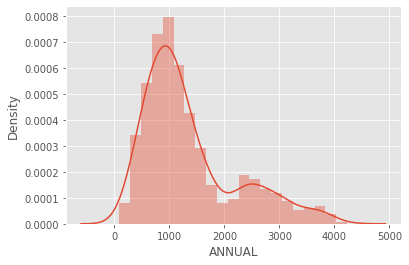

In [72]:
sns.distplot(data['ANNUAL'], hist =True)

Plot is right skewed and this distribution is not a normal(gaussian) distribution.

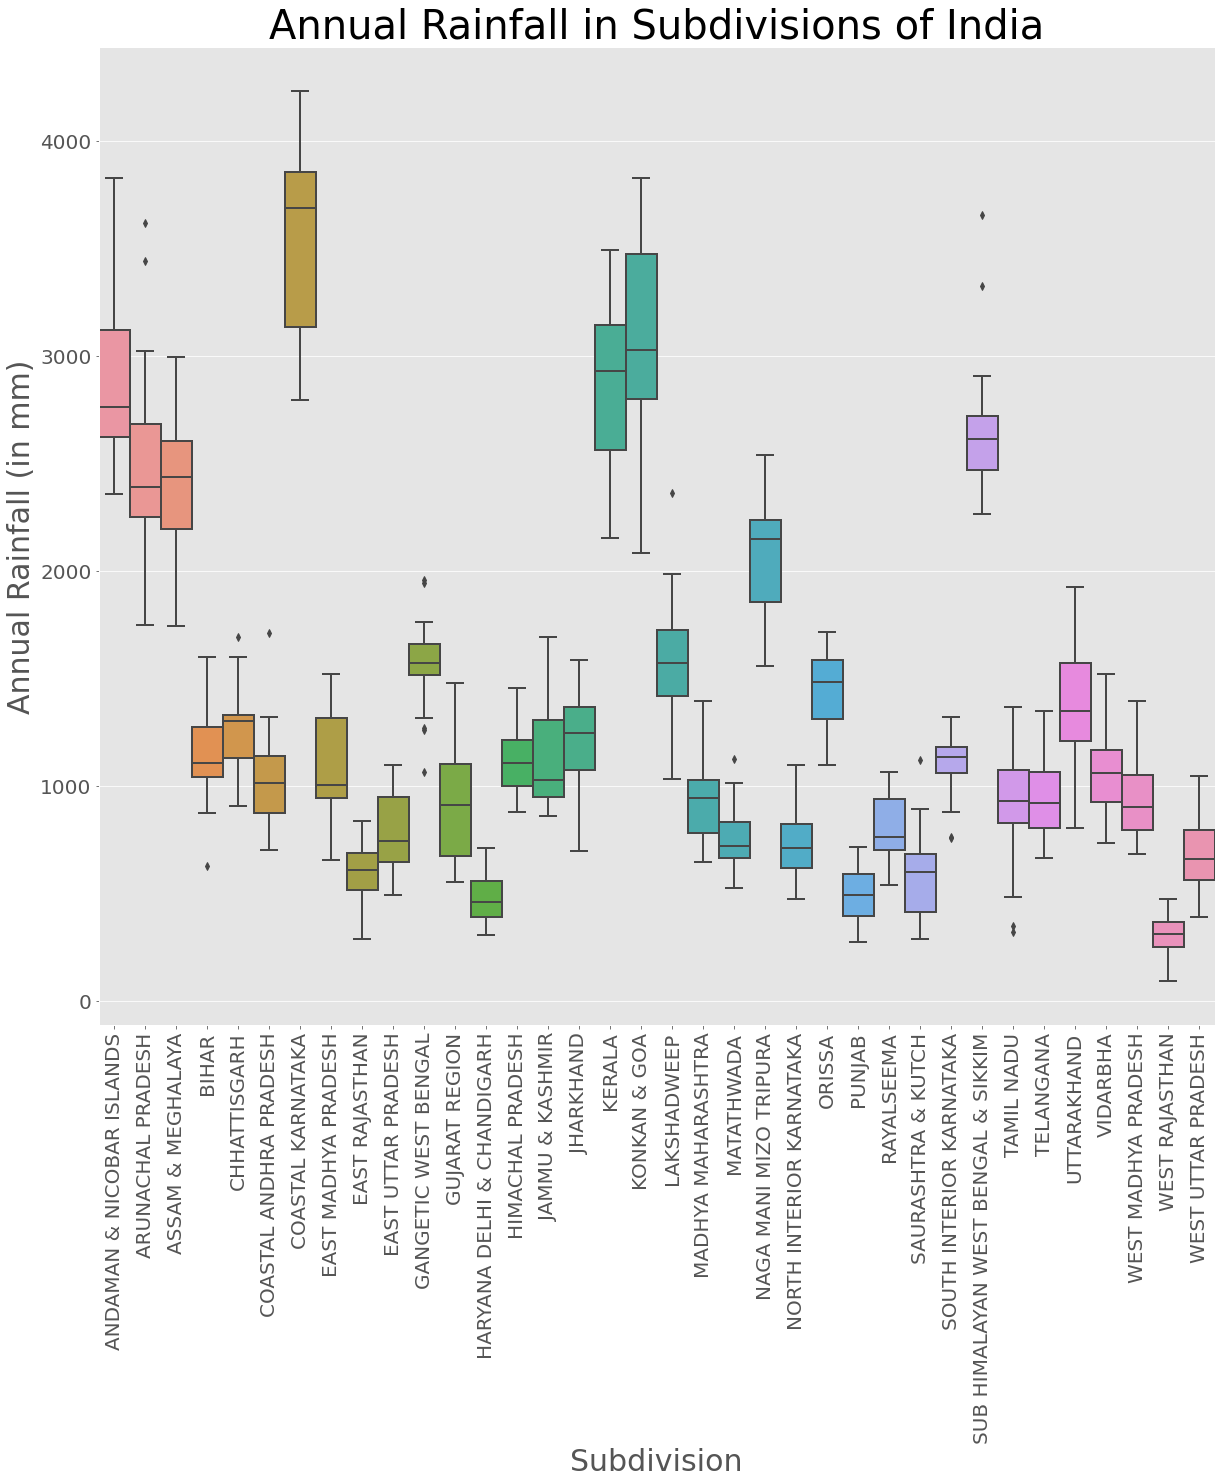

In [73]:
# Annual rainfall in subdivisions of India
plt.figure(figsize=(20,18))
ax = sns.boxplot(x="STATE_UT_NAME", y="ANNUAL", data=data, width=1, linewidth=2)
ax.set_xlabel('Subdivision',fontsize=30)
ax.set_ylabel('Annual Rainfall (in mm)',fontsize=30)
plt.title('Annual Rainfall in Subdivisions of India',fontsize=40)
ax.tick_params(axis='x', labelsize=20, rotation=90)
ax.tick_params(axis='y', labelsize=20, rotation=0)

Clearly we can see that Coastal Karnataka has recorded maximum rainfall annually

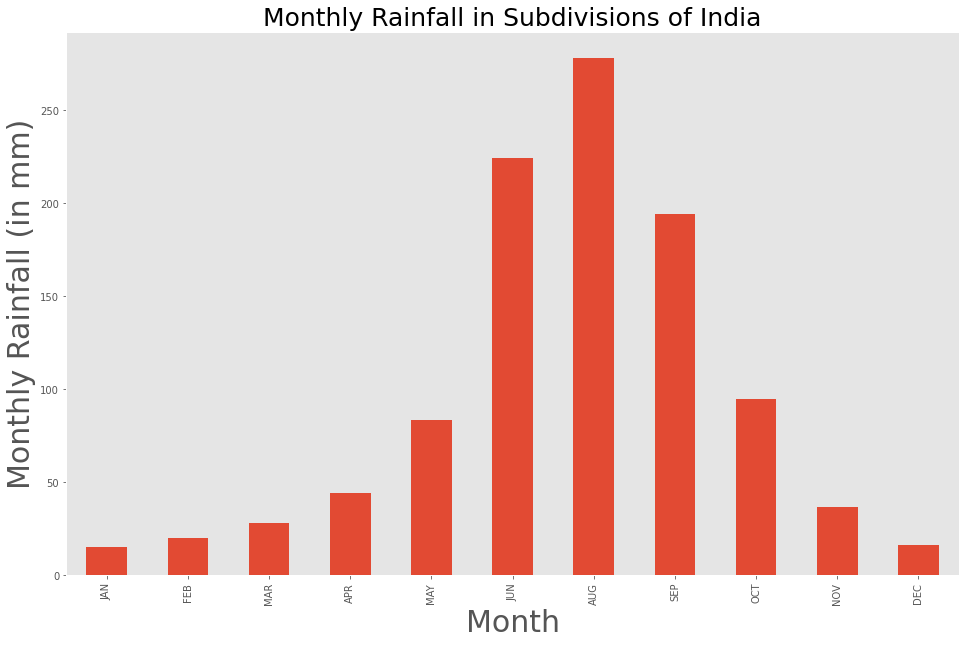

In [74]:
# Average monthly rainfall in India
ax=data[['JAN', 'FEB', 'MAR', 'APR','MAY', 'JUN', 'AUG', 'SEP', 'OCT','NOV','DEC']].mean().plot.bar(width=0.5, linewidth=2, figsize=(16,10))
plt.xlabel('Month',fontsize=30)
plt.ylabel('Monthly Rainfall (in mm)', fontsize=30)
plt.title('Monthly Rainfall in Subdivisions of India', fontsize=25)
ax.tick_params(labelsize=10)
plt.grid()

Average rainfall received is maximum in the month of August followed by June and then September

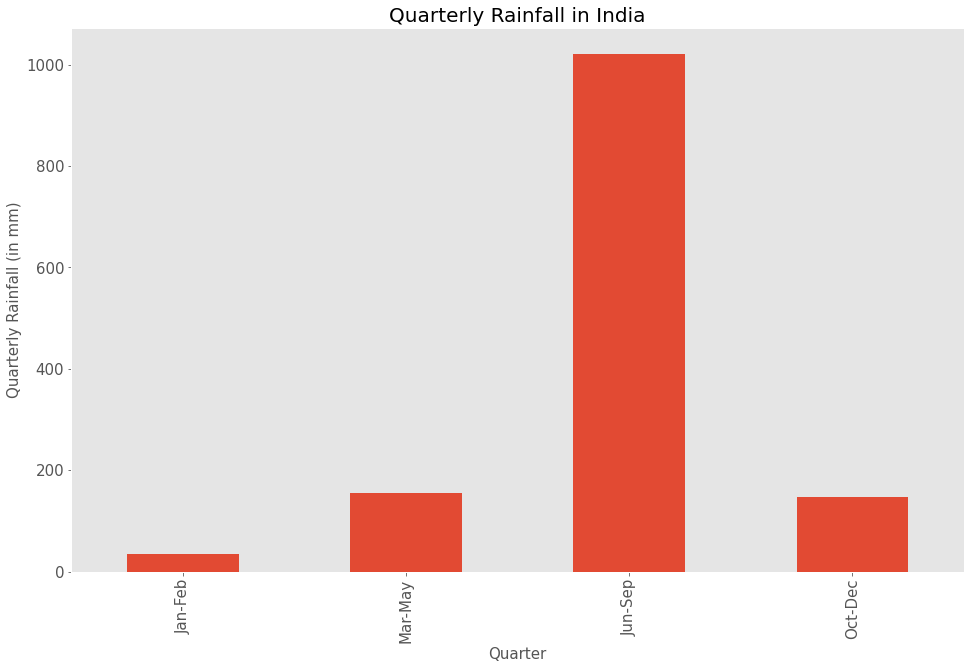

In [75]:
# Average monthly rainfall in India
ax = data[['Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']].mean().plot.bar(width=0.5, linewidth=2, figsize=(16,10))
plt.xlabel('Quarter',fontsize=15)
plt.ylabel('Quarterly Rainfall (in mm)', fontsize=15)
plt.title('Quarterly Rainfall in India', fontsize=20)
ax.tick_params(labelsize=15)
plt.grid()

Now, let's analyze the rainfall data of Haryana, delhi & Chandigarh

In [76]:
# Getting rainfall data for Haryana, delhi & Chandigarh
Haryana = data.loc[((data['STATE_UT_NAME'] == 'HARYANA DELHI & CHANDIGARH') | (data['STATE_UT_NAME'] == 'HARYANA DELHI & CHANDIGARH'))]
Haryana.head()

,STATE_UT_NAME,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
228,HARYANA DELHI & CHANDIGARH,1997,6.6,2.2,14.6,35.3,38.0,60.2,133.6,226.8,36.9,53.7,13.4,47.3,668.6,8.8,87.9,457.5,114.4
229,HARYANA DELHI & CHANDIGARH,1998,0.4,24.6,25.4,9.1,6.1,68.4,154.8,161.6,150.9,78.2,5.8,0.0,685.3,25.0,40.6,535.6,84.0
230,HARYANA DELHI & CHANDIGARH,1999,31.7,0.7,1.4,0.0,20.1,42.2,109.8,78.7,54.7,4.8,0.0,0.4,344.4,32.4,21.5,285.4,5.1
231,HARYANA DELHI & CHANDIGARH,2000,17.1,29.1,1.4,1.3,22.8,58.9,146.8,87.9,17.5,0.0,0.4,1.2,384.4,46.2,25.6,311.1,1.6
232,HARYANA DELHI & CHANDIGARH,2001,17.8,5.2,7.2,19.8,47.8,117.2,145.2,103.5,10.3,11.1,0.1,0.2,485.5,23.0,74.8,376.3,11.4


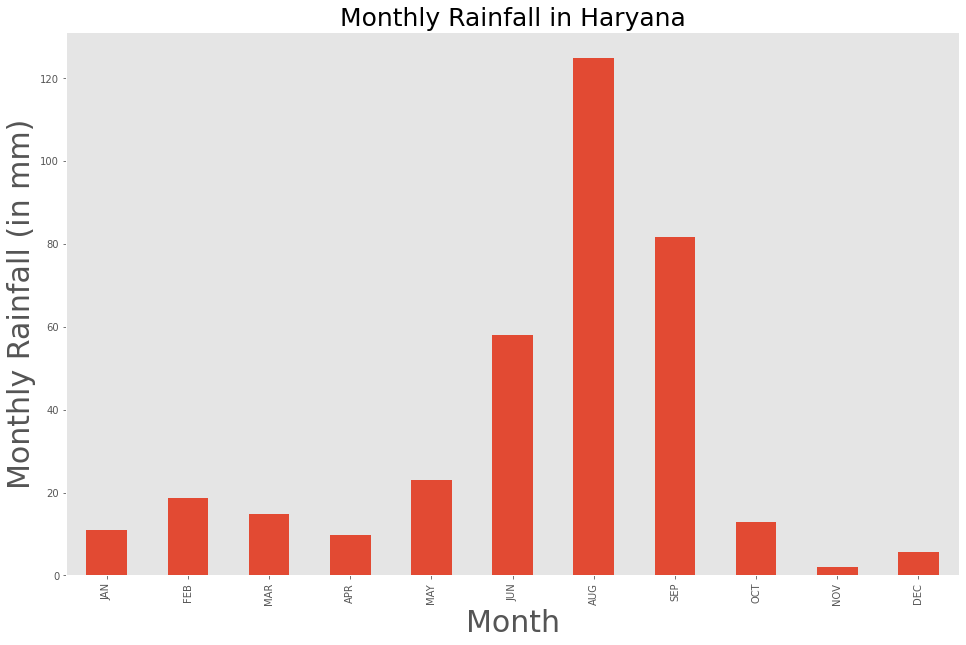

In [77]:
 #Average monthly rainfall in Haryana, delhi & Chandigarh
ax = Haryana[['JAN', 'FEB', 'MAR', 'APR','MAY', 'JUN', 'AUG', 'SEP', 'OCT','NOV','DEC']].mean().plot.bar(width=0.5, linewidth=2, figsize=(16,10))
plt.xlabel('Month',fontsize=30)
plt.ylabel('Monthly Rainfall (in mm)', fontsize=30)
plt.title('Monthly Rainfall in Haryana', fontsize=25)
ax.tick_params(labelsize=10)
plt.grid()

August happens to be the most rainy month in Haryana, delhi & Chandigarh.

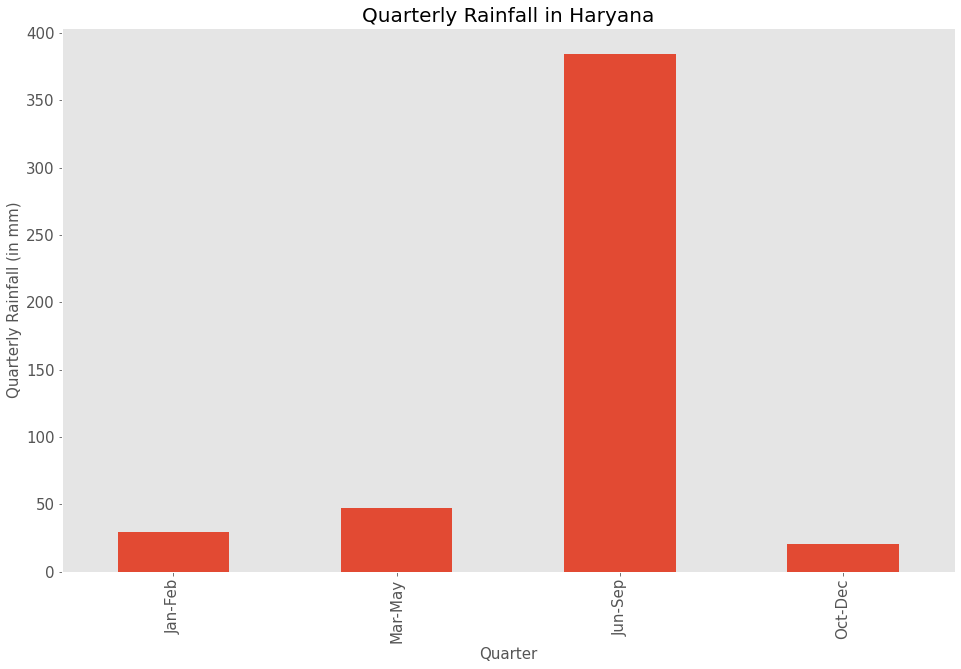

In [78]:
# Average monthly rainfall in Haryana, delhi & Chandigarh
ax=Haryana[['Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']].mean().plot.bar(width=0.5, linewidth=2, figsize=(16,10))
plt.xlabel('Quarter',fontsize=15)
plt.ylabel('Quarterly Rainfall (in mm)', fontsize=15)
plt.title('Quarterly Rainfall in Haryana', fontsize=20)
ax.tick_params(labelsize=15)
plt.grid()

Only Jun-Sep seems to have received maximum rainfall, that too is minimum as compared to other subdivisions.

In [79]:
print('Average annual rainfall received by Haryana = ',int(Haryana['ANNUAL'].mean()),'mm')
a = Haryana[Haryana['YEAR'] == 1997]
a

Average annual rainfall received by Haryana =  482 mm


,STATE_UT_NAME,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
228,HARYANA DELHI & CHANDIGARH,1997,6.6,2.2,14.6,35.3,38.0,60.2,133.6,226.8,36.9,53.7,13.4,47.3,668.6,8.8,87.9,457.5,114.4


# Now, let's analyze the rainfall data of COASTAL KARNATAKA

#Since, we know that coastal karnataka has recorded maximum rainfall over the years, let's analyze it.

In [80]:
# Getting rainfall data for coastal karnataka
karnataka = data.loc[(data['STATE_UT_NAME'] == 'COASTAL KARNATAKA')]
karnataka.head()

,STATE_UT_NAME,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
114,COASTAL KARNATAKA,1997,0.7,0.0,14.9,21.5,23.1,818.6,1494.1,1146.0,117.1,148.5,109.8,59.2,3953.6,0.7,59.5,3575.8,317.5
115,COASTAL KARNATAKA,1998,0.0,0.0,1.4,6.6,72.0,966.4,1092.0,633.9,572.8,271.0,80.6,11.3,3707.9,0.0,80.0,3265.1,362.9
116,COASTAL KARNATAKA,1999,0.0,0.4,0.4,7.1,335.5,854.1,1525.9,518.4,186.5,338.2,12.8,0.5,3779.9,0.4,343.0,3084.9,351.5
117,COASTAL KARNATAKA,2000,14.9,0.5,0.9,25.8,216.4,966.8,915.6,741.7,279.2,174.7,12.5,2.4,3351.3,15.5,243.0,2903.3,189.6
118,COASTAL KARNATAKA,2001,0.6,0.4,0.4,71.4,156.9,930.0,926.9,654.4,151.8,169.7,48.6,0.6,3111.6,1.0,228.7,2663.1,218.9


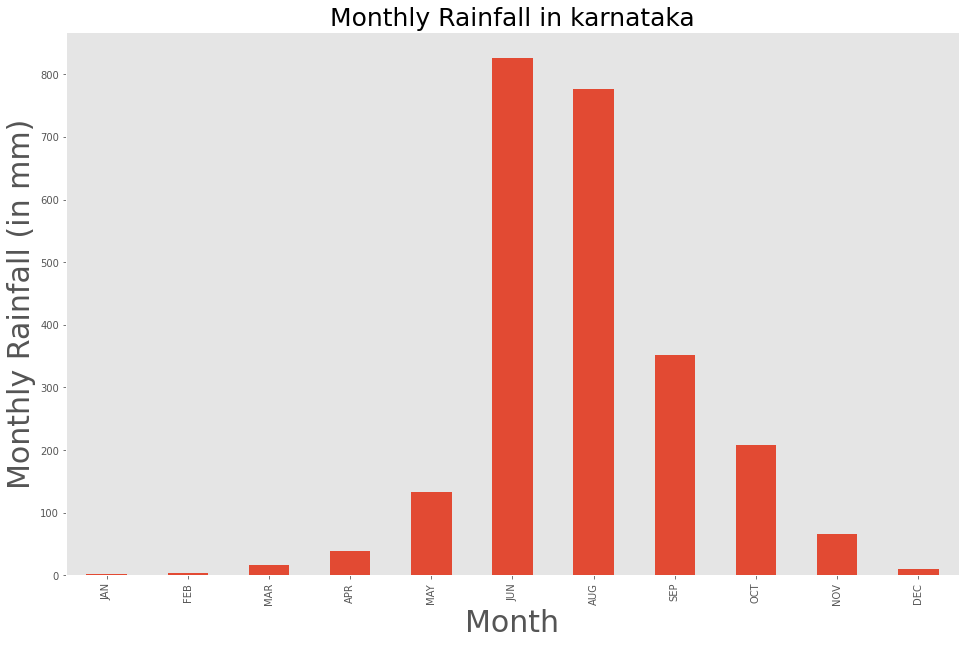

In [82]:
# Average monthly rainfall in karnataka
ax = karnataka[['JAN', 'FEB', 'MAR', 'APR','MAY', 'JUN', 'AUG', 'SEP', 'OCT','NOV','DEC']].mean().plot.bar(width=0.5, linewidth=2, figsize=(16,10))
plt.xlabel('Month',fontsize=30)
plt.ylabel('Monthly Rainfall (in mm)', fontsize=30)
plt.title('Monthly Rainfall in karnataka', fontsize=25)
ax.tick_params(labelsize=10)
plt.grid()

Here shows in June month have maximum rainfall

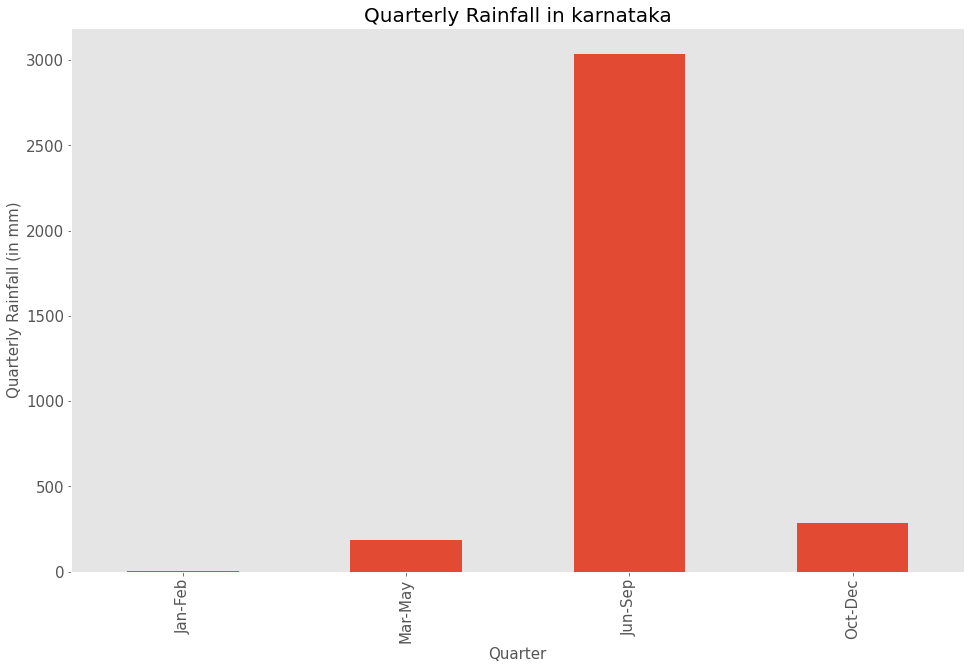

In [83]:
# Average monthly rainfall in karnataka
ax = karnataka[['Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']].mean().plot.bar(width=0.5, linewidth=2, figsize=(16,10))
plt.xlabel('Quarter',fontsize=15)
plt.ylabel('Quarterly Rainfall (in mm)', fontsize=15)
plt.title('Quarterly Rainfall in karnataka', fontsize=20)
ax.tick_params(labelsize=15)
plt.grid()

Jun-Sept quarter in karnataka is receiving maximum rainfall

Let's find out which states and years have recorded the maximum and minimum rainfall in India.

In [84]:
# Subdivisions receiving maximum and minimum rainfall
print(data.groupby('STATE_UT_NAME').mean()['ANNUAL'].sort_values(ascending=False).head(10))
print('\n')
print("--------------------------------------------")
print(data.groupby('STATE_UT_NAME').mean()['ANNUAL'].sort_values(ascending=False).tail(10))

STATE_UT_NAME
COASTAL KARNATAKA                     3538.405556
KONKAN & GOA                          3073.121053
ANDAMAN & NICOBAR ISLANDS             2914.200000
KERALA                                2891.968421
SUB HIMALAYAN WEST BENGAL & SIKKIM    2666.794737
ARUNACHAL PRADESH                     2502.163158
ASSAM & MEGHALAYA                     2386.384211
NAGA MANI MIZO TRIPURA                2045.510526
LAKSHADWEEP                           1602.226316
GANGETIC WEST BENGAL                  1562.715789
Name: ANNUAL, dtype: float64


--------------------------------------------
STATE_UT_NAME
RAYALSEEMA                    797.252632
EAST UTTAR PRADESH            773.121053
MATATHWADA                    749.294737
NORTH INTERIOR KARNATAKA      716.326316
WEST UTTAR PRADESH            684.921053
EAST RAJASTHAN                593.331579
SAURASHTRA & KUTCH            575.952632
PUNJAB                        502.294737
HARYANA DELHI & CHANDIGARH    482.052632
WEST RAJASTHAN             

As you can see that the subdivsions receiving maximum rainfall belongs to the southern and eastern parts of India 
whereas those receiving minimum rainfall belongs to the northern parts of India.

In [85]:
# Years which recorded maximum and minimum rainfall
print(data.groupby('YEAR').mean()['ANNUAL'].sort_values(ascending=False).head(10))
print('\n')
print("--------------------------------------------")
print(data.groupby('YEAR').mean()['ANNUAL'].sort_values(ascending=False).tail(10))

YEAR
1998    1526.777778
2007    1514.066667
2013    1475.172222
2010    1468.194444
2005    1456.430556
1997    1416.175000
2006    1406.838889
2011    1392.955556
1999    1388.022222
2008    1367.394444
Name: ANNUAL, dtype: float64


--------------------------------------------
YEAR
2008    1367.394444
2003    1354.463889
2000    1324.188571
2001    1302.702778
2004    1298.700000
2015    1280.583333
2014    1244.336111
2012    1243.557143
2009    1192.760000
2002    1148.830556
Name: ANNUAL, dtype: float64
